## K_means(Kümeleme)
1)Yalnızca sayısal değişkenler

2)Verilerdeaykırı değer olmamalıdır.

3)Veriler simetrik normal dağılıma sahip olmalıdır.Gerçek verilerde
her zaman aykırı değerler bulunur ve bunlardan kurtulmak
zordur.Verilerin normal dağılıma dönüştürülmesi bu sorunların
etkisinin azaltılmasına yardımcı olur. Bu şekilde algoritmanın
kümeleri tanımlaması çok daha kolay olur.

4)Veriler aynı ölçekte olmalıdır, dolayısıyla verilerin farklı
ölçülerde olduğu durumda normalleştirilmesi gerekmektedir.

5)Veriler arasında yüksek korelasyon olmamalıdır. -->

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import shapiro

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns = ["CustomerID","Cinsiyet","Yas","YillikGelir($)","HarcamaSkoru"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Cinsiyet        200 non-null    object
 2   Yas             200 non-null    int64 
 3   YillikGelir($)  200 non-null    int64 
 4   HarcamaSkoru    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Yas,YillikGelir($),HarcamaSkoru
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID        0
Cinsiyet          0
Yas               0
YillikGelir($)    0
HarcamaSkoru      0
dtype: int64

In [7]:
df[df.duplicated()]

,CustomerID,Cinsiyet,Yas,YillikGelir($),HarcamaSkoru


In [8]:
sayisal_sutunlar=["Yas","YillikGelir($)","HarcamaSkoru"]
sayisal_olamayan = ["Cinsiyet"]

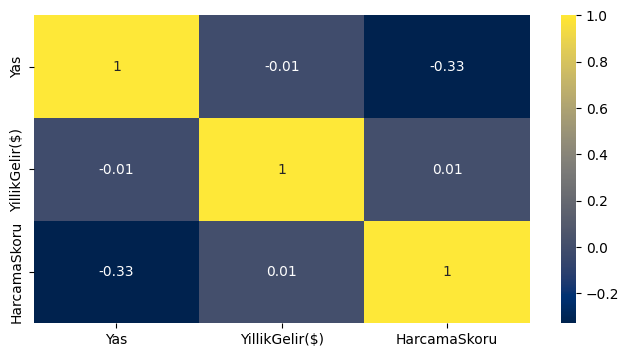

In [9]:
plt.figure(figsize=(8, 4))
dfata=sns.heatmap(df[sayisal_sutunlar].corr().round(2),annot=True,cmap="cividis")
plt.show()

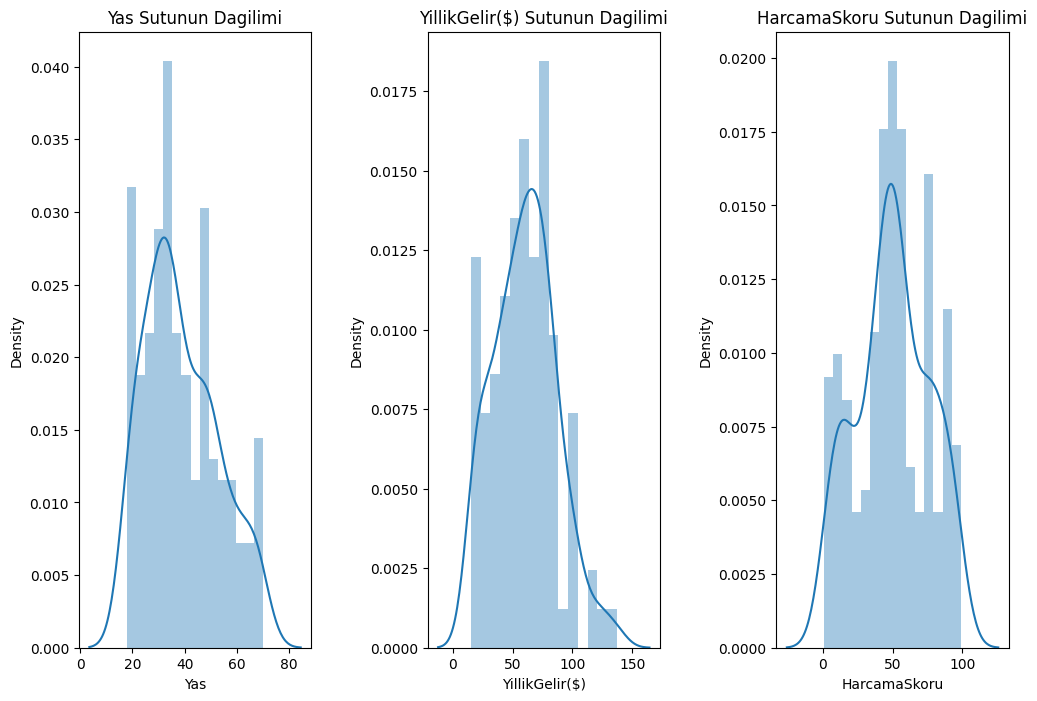

In [10]:
plt.figure(1 , figsize = (12, 8))
n = 0
for x in df.columns[2:]:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('{} Sutunun Dagilimi'.format(x))
plt.show()


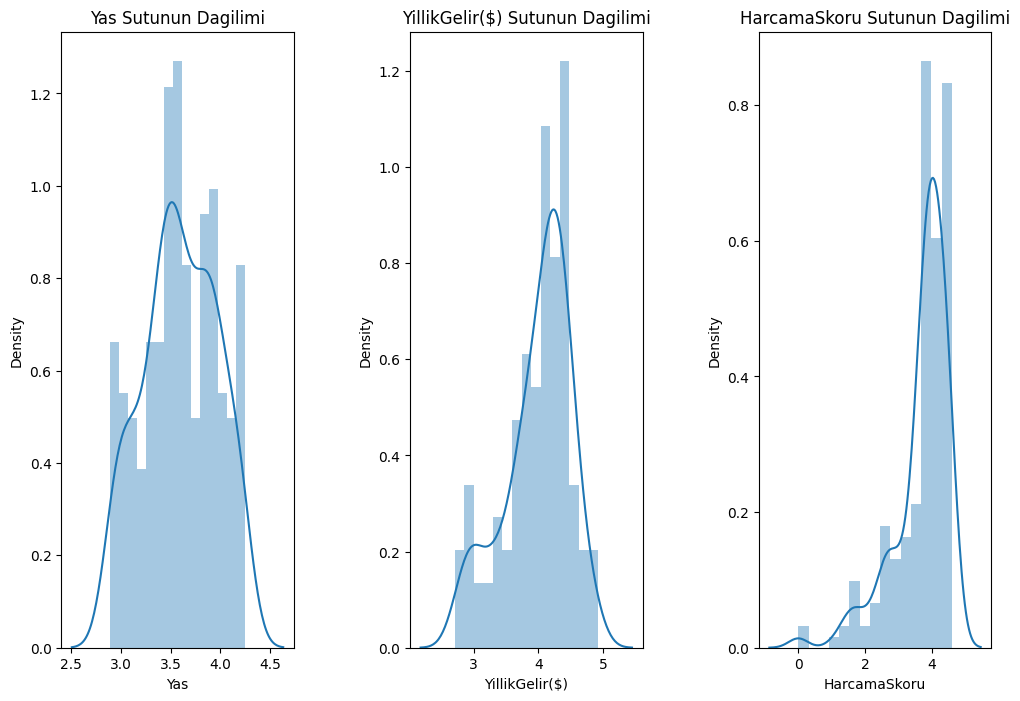

In [11]:
plt.figure(1 , figsize = (12, 8))
n = 0
for x in df.columns[2:]:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(np.log(df[x]) , bins = 15)
    plt.title('{} Sutunun Dagilimi'.format(x))
plt.show()


In [12]:
stat , p_value = shapiro(np.log(df["HarcamaSkoru"]))
print("Test istatistiği: {}\np_value: {}".format(stat, p_value))
if (p_value > 0.5):
    print("Veri normal dağiliyor")
else:
    print("veri normal dağilmiyor")


Test istatistiği: 0.8202439546585083
p_value: 1.901090233586561e-14
veri normal dağilmiyor


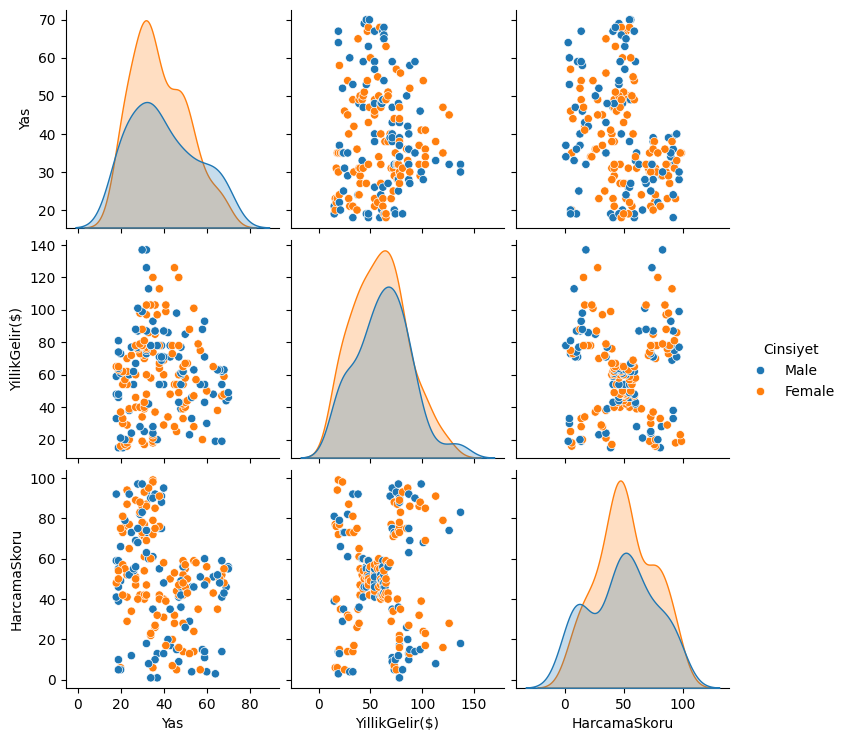

In [13]:
sns.pairplot(df, vars = df.columns[2:], hue = "Cinsiyet")
plt.show()

In [14]:
X = df[["HarcamaSkoru"]]
X["log_Yas"] = np.log(df["Yas"])
X["log_YillikGelir"] = np.log(df["YillikGelir($)"])
X.head()

,HarcamaSkoru,log_Yas,log_YillikGelir
0,39,2.944439,2.708050
1,81,3.044522,2.708050
2,6,2.995732,2.772589
3,77,3.135494,2.772589
4,40,3.433987,2.833213


In [15]:
kmeans_kwargs ={'init':'random','n_init':10,'max_iter':300,'random_state':21}
x = X.values
sse=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,**kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

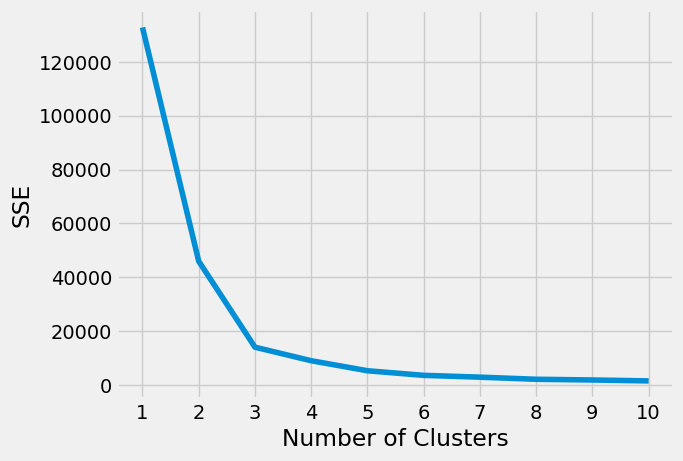

In [16]:
from kneed import KneeLocator
plt.style.use('fivethirtyeight')
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE');
kl = KneeLocator(range(1,11),sse,curve='convex',direction='decreasing')
cluster_numb = kl.elbow

In [54]:
cluster_numb = 3

In [55]:
kmeans= KMeans(init='random',n_clusters=cluster_numb,n_init=10,max_iter=300,random_state=21)
kmeans.fit(x)
kmeans.inertia_
df['label'] =kmeans.labels_
df.head()

,CustomerID,Cinsiyet,Yas,YillikGelir($),HarcamaSkoru,label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1


<Figure size 1800x1200 with 0 Axes>

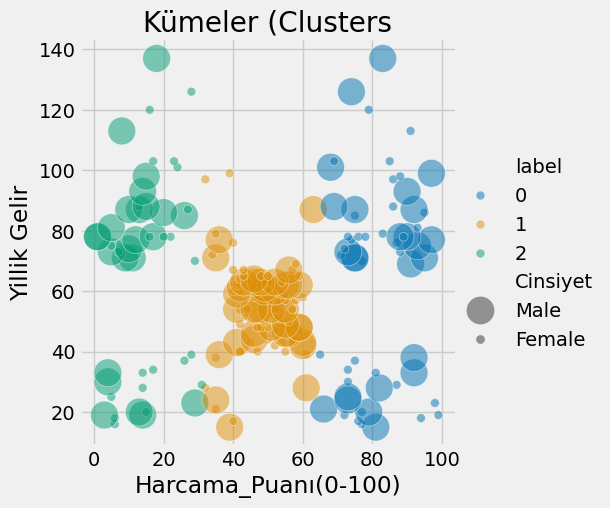

In [62]:
plt.figure(figsize=(18,12))
sns.relplot(x="HarcamaSkoru", y="YillikGelir($)", hue="label", size="Cinsiyet",
            sizes=(40, 400), alpha=.5, palette="colorblind",height=5,data=df)
plt.title('Kümeler (Clusters')
plt.xlabel('Harcama_Puanı(0-100)')
plt.ylabel('Yillik Gelir')
plt.show()

In [24]:
df.groupby("label")[df.columns[2:-1]].mean()

,Yas,YillikGelir($),HarcamaSkoru
label,,,
0,29.898305,64.847458,81.779661
1,42.414894,54.553191,48.180851
2,42.957447,67.191489,14.595745


In [28]:
label_0= df[df["label"]==0]
label_0.describe()

,CustomerID,Yas,YillikGelir($),HarcamaSkoru,label
count,59.000000,59.000000,59.000000,59.000000,59.0
mean,112.338983,29.898305,64.847458,81.779661,0.0
std,70.020837,5.652875,32.558602,9.283036,0.0
min,2.000000,18.000000,15.000000,65.000000,0.0
25%,33.000000,26.000000,31.500000,74.000000,0.0
50%,140.000000,30.000000,74.000000,81.000000,0.0
75%,170.000000,34.500000,86.500000,90.000000,0.0
max,200.000000,40.000000,137.000000,99.000000,0.0


In [35]:
label_0.groupby("Cinsiyet")[df.columns[2:]].mean()

,Yas,YillikGelir($),HarcamaSkoru,label
Cinsiyet,,,,
Female,29.617647,62.970588,81.235294,0.0
Male,30.280000,67.400000,82.520000,0.0


In [37]:
label_1=df[df["label"]==1]
label_1.describe()

,CustomerID,Yas,YillikGelir($),HarcamaSkoru,label
count,94.000000,94.000000,94.000000,94.000000,94.0
mean,85.308511,42.414894,54.553191,48.180851,1.0
std,35.270392,15.861233,14.442781,7.823267,0.0
min,1.000000,18.000000,15.000000,32.000000,1.0
25%,61.250000,28.250000,46.000000,42.000000,1.0
50%,84.500000,44.000000,54.000000,48.000000,1.0
75%,107.750000,53.750000,63.000000,55.000000,1.0
max,185.000000,70.000000,99.000000,63.000000,1.0


In [41]:
label_1.groupby("Cinsiyet")[df.columns[2:]].mean()

,Yas,YillikGelir($),HarcamaSkoru,label
Cinsiyet,,,,
Female,41.327273,55.200000,47.272727,1.0
Male,43.948718,53.641026,49.461538,1.0


In [43]:
label_3=df[df["label"]==2]
label_3.describe()

,CustomerID,Yas,YillikGelir($),HarcamaSkoru,label
count,47.000000,47.000000,47.000000,47.000000,47.0
mean,116.021277,42.957447,67.191489,14.595745,2.0
std,69.984933,12.217161,32.919954,8.355315,0.0
min,3.000000,19.000000,16.000000,1.000000,2.0
25%,34.000000,35.500000,33.000000,7.500000,2.0
50%,145.000000,44.000000,77.000000,14.000000,2.0
75%,172.000000,52.000000,87.000000,20.000000,2.0
max,199.000000,67.000000,137.000000,31.000000,2.0


In [44]:
label_3.groupby("Cinsiyet")[df.columns[2:]].mean()

,Yas,YillikGelir($),HarcamaSkoru,label
Cinsiyet,,,,
Female,42.913043,63.434783,17.782609,2.0
Male,43.000000,70.791667,11.541667,2.0
